In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [2]:
# read in files
pDNA_counts = pd.read_csv("/active/cherry_t/091923_LVBM_data/Twist_pDNA/Twist_pDNA_Barcode_counts_alt.txt", sep = "\t")
cDNA_counts = pd.read_csv("/active/cherry_t/091923_LVBM_data/Twist_cDNA/Twist_cDNA_Barcode_counts_alt.txt", sep = "\t")

In [6]:
pDNA_counts.head()

,Barcode,ID,Counts_1,Counts_2,Counts_3,Counts_4,Combined_Counts
0,TCTGTGACACTGTGAGAG,Abca4_pilot_chr1:94160888-94161133,0,0,0,0,0
1,TGAGACTGACTGTGTCAC,Abca4_pilot_chr1:94160888-94161133,0,0,0,0,0
2,ACAGTCAGTCTGTGAGAG,Abca4_pilot_chr1:94160888-94161133,0,0,0,0,0
3,TCACAGTCACACAGAGAG,Abca4_pilot_chr1:94160888-94161133,60,29,49,22,160
4,ACTCTCTGTCTCAGTCTC,Abca4_pilot_chr1:94160888-94161133,0,0,0,0,0


In [3]:
# filter pDNA counts for extant reads
pDNA_counts_above10 = pDNA_counts.loc[pDNA_counts['Combined_Counts'] >= 10]
pDNA_counts_above10.pop('Counts_1')
pDNA_counts_above10.pop('Counts_2')
pDNA_counts_above10.pop('Counts_3')
pDNA_counts_above10.pop('Counts_4')

pDNA_counts_above10

,Barcode,ID,Combined_Counts
3,TCACAGTCACACAGAGAG,Abca4_pilot_chr1:94160888-94161133,160
68,TCACTCTCTCTCTCACAC,Abca4_pilot_chr1:94160888-94161133,18
70,TCTCAGTCTGTGTGTGTG,Abca4_pilot_chr1:94160888-94161133,18
163,TCAGAGACACTCAGAGTG,Abca4_pilot_chr1:94160888-94161133,223
166,TCACACAGTGACAGAGTG,Abca4_pilot_chr1:94160888-94161133,384
...,...,...,...
42316,TCAGACTCACTCACTCAC,5q14.3_Enhancer3_chr5:88555652-88555897,28
42326,TCAGAGTGACAGTGACAC,5q14.3_Enhancer3_chr5:88555652-88555897,16
42349,TCTCTGACTCACAGACAC,5q14.3_Enhancer3_chr5:88555652-88555897,10
42362,TCTCTGAGACTCACACAC,5q14.3_Enhancer3_chr5:88555652-88555897,17


In [4]:
pDNA_counts_above10 = pDNA_counts_above10.rename(columns = {"Combined_Counts" : "pDNA_counts"})
pDNA_counts_above10

,Barcode,ID,pDNA_counts
3,TCACAGTCACACAGAGAG,Abca4_pilot_chr1:94160888-94161133,160
68,TCACTCTCTCTCTCACAC,Abca4_pilot_chr1:94160888-94161133,18
70,TCTCAGTCTGTGTGTGTG,Abca4_pilot_chr1:94160888-94161133,18
163,TCAGAGACACTCAGAGTG,Abca4_pilot_chr1:94160888-94161133,223
166,TCACACAGTGACAGAGTG,Abca4_pilot_chr1:94160888-94161133,384
...,...,...,...
42316,TCAGACTCACTCACTCAC,5q14.3_Enhancer3_chr5:88555652-88555897,28
42326,TCAGAGTGACAGTGACAC,5q14.3_Enhancer3_chr5:88555652-88555897,16
42349,TCTCTGACTCACAGACAC,5q14.3_Enhancer3_chr5:88555652-88555897,10
42362,TCTCTGAGACTCACACAC,5q14.3_Enhancer3_chr5:88555652-88555897,17


In [5]:
# join in cDNA summed counts
Twist_counts = pDNA_counts_above10.merge(cDNA_counts, how = "left", on = "Barcode", suffixes=('_pDNA', '_cDNA'))
Twist_counts = Twist_counts.rename(columns = {'ID_pDNA': 'ID', "Combined_Counts": "cDNA_counts"}).drop(columns = ['ID_cDNA', 'Counts_1', 'Counts_2', 'Counts_3', 'Counts_4'])
Twist_counts

,Barcode,ID,pDNA_counts,cDNA_counts
0,TCACAGTCACACAGAGAG,Abca4_pilot_chr1:94160888-94161133,160,59
1,TCACTCTCTCTCTCACAC,Abca4_pilot_chr1:94160888-94161133,18,41
2,TCTCAGTCTGTGTGTGTG,Abca4_pilot_chr1:94160888-94161133,18,0
3,TCAGAGACACTCAGAGTG,Abca4_pilot_chr1:94160888-94161133,223,0
4,TCACACAGTGACAGAGTG,Abca4_pilot_chr1:94160888-94161133,384,0
...,...,...,...,...
2470,TCAGACTCACTCACTCAC,5q14.3_Enhancer3_chr5:88555652-88555897,28,25
2471,TCAGAGTGACAGTGACAC,5q14.3_Enhancer3_chr5:88555652-88555897,16,30
2472,TCTCTGACTCACAGACAC,5q14.3_Enhancer3_chr5:88555652-88555897,10,85
2473,TCTCTGAGACTCACACAC,5q14.3_Enhancer3_chr5:88555652-88555897,17,36


In [6]:
# get ratio
Twist_counts['Normalized_Counts'] = Twist_counts['cDNA_counts'] / Twist_counts['pDNA_counts']
Twist_counts

,Barcode,ID,pDNA_counts,cDNA_counts,Normalized_Counts
0,TCACAGTCACACAGAGAG,Abca4_pilot_chr1:94160888-94161133,160,59,0.368750
1,TCACTCTCTCTCTCACAC,Abca4_pilot_chr1:94160888-94161133,18,41,2.277778
2,TCTCAGTCTGTGTGTGTG,Abca4_pilot_chr1:94160888-94161133,18,0,0.000000
3,TCAGAGACACTCAGAGTG,Abca4_pilot_chr1:94160888-94161133,223,0,0.000000
4,TCACACAGTGACAGAGTG,Abca4_pilot_chr1:94160888-94161133,384,0,0.000000
...,...,...,...,...,...
2470,TCAGACTCACTCACTCAC,5q14.3_Enhancer3_chr5:88555652-88555897,28,25,0.892857
2471,TCAGAGTGACAGTGACAC,5q14.3_Enhancer3_chr5:88555652-88555897,16,30,1.875000
2472,TCTCTGACTCACAGACAC,5q14.3_Enhancer3_chr5:88555652-88555897,10,85,8.500000
2473,TCTCTGAGACTCACACAC,5q14.3_Enhancer3_chr5:88555652-88555897,17,36,2.117647


In [7]:
Twist_counts.to_csv("/active/cherry_t/091923_LVBM_data/Twist_Normalized_Counts.txt", sep='\t', index=False)

In [29]:
Twist_counts_sorted = Twist_counts.sort_values(by='Normalized_Counts', ascending=False)

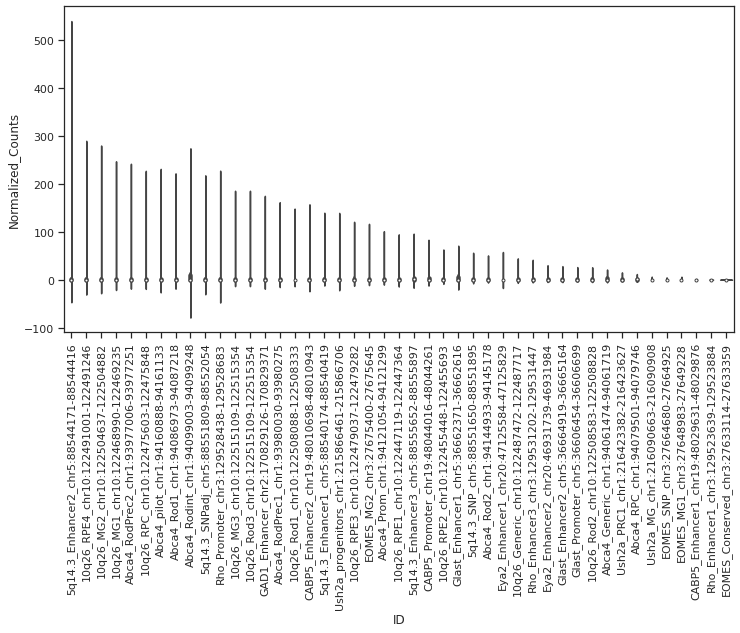

In [64]:
# plotting
seaborn.set(style='ticks')
plt.figure(figsize=(12,6))
plot_all = seaborn.violinplot(x='ID',
                  y='Normalized_Counts',
                  data = Twist_counts_sorted)
plot_all.tick_params(axis = 'x', rotation=90)
plt.savefig("/active/cherry_t/091923_LVBM_data/Twist_Normalized_Counts_violin.pdf", format='pdf', bbox_inches='tight')

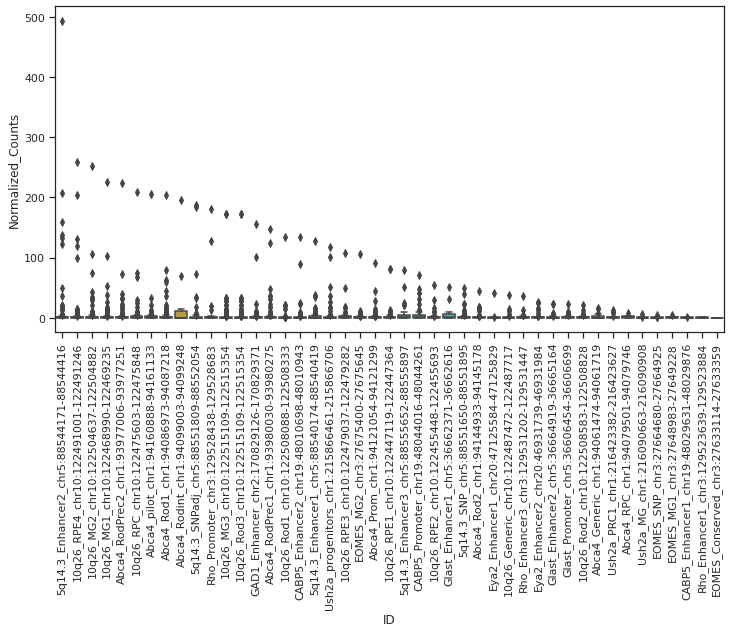

In [65]:
seaborn.set(style='ticks')
plt.figure(figsize=(12,6))
plot_all = seaborn.boxplot(x='ID',
                  y='Normalized_Counts',
                  data = Twist_counts_sorted)
plot_all.tick_params(axis = 'x', rotation=90)
plt.savefig("/active/cherry_t/091923_LVBM_data/Twist_Normalized_Counts_box.pdf", format='pdf', bbox_inches='tight')

In [38]:
#Consider splitting up the values by quartile
Twist_counts['ID'].nunique()

45

In [58]:
grouped = Twist_counts.groupby('ID')
Q1_counts = []
for name, group in grouped:
    Q1_value = group['Normalized_Counts'].quantile(0.75)
    Q1_df = group[group['Normalized_Counts'] >= Q1_value]
    Q1_counts.append(Q1_df)
result = pd.concat(Q1_counts)
result

,Barcode,ID,pDNA_counts,cDNA_counts,Normalized_Counts,Quartiles
1609,TCACTGTCACTCACACAC,10q26_Generic_chr10:122487472-122487717,22,138,6.272727,3
1617,TCACAGTCTCTCTCAGAG,10q26_Generic_chr10:122487472-122487717,10,6,0.600000,2
1621,TCTCAGAGACACACACAG,10q26_Generic_chr10:122487472-122487717,40,76,1.900000,3
1624,TCTGAGTGTCTCTGACTC,10q26_Generic_chr10:122487472-122487717,252,227,0.900794,3
1631,TCACTGACTCTCACACTC,10q26_Generic_chr10:122487472-122487717,35,1333,38.085714,3
...,...,...,...,...,...,...
593,TCTGTCAGTCACACAGAC,Ush2a_progenitors_chr1:215866461-215866706,12,124,10.333333,3
597,TCTCACACAGACACTCAC,Ush2a_progenitors_chr1:215866461-215866706,18,317,17.611111,3
599,TCTCACTCACAGAGACAC,Ush2a_progenitors_chr1:215866461-215866706,10,256,25.600000,3
602,TCTCACTCACACTCACAC,Ush2a_progenitors_chr1:215866461-215866706,36,595,16.527778,3


In [60]:
result['ID'].nunique()

45

In [54]:
Twist_Q3 = Twist_counts.loc[Twist_counts['Quartiles'] == 3]

Twist_Q3

,Barcode,ID,pDNA_counts,cDNA_counts,Normalized_Counts,Quartiles
1,TCACTCTCTCTCTCACAC,Abca4_pilot_chr1:94160888-94161133,18,41,2.277778,3
12,TCTCAGAGACAGACTCAG,Abca4_pilot_chr1:94160888-94161133,59,1923,32.593220,3
17,TCTCACTCACACACACAG,Abca4_pilot_chr1:94160888-94161133,11,48,4.363636,3
26,TCTCAGAGTGAGTCTCTC,Abca4_pilot_chr1:94160888-94161133,31,6362,205.225806,3
33,TCTCAGACACTCTCACTC,Abca4_pilot_chr1:94160888-94161133,15,82,5.466667,3
...,...,...,...,...,...,...
2452,TCTGAGTCACACACTCAG,5q14.3_Enhancer3_chr5:88555652-88555897,20,91,4.550000,3
2459,TCTGTGACACACTGACTC,5q14.3_Enhancer3_chr5:88555652-88555897,91,1884,20.703297,3
2460,TCACACTCAGTGAGACTC,5q14.3_Enhancer3_chr5:88555652-88555897,17,94,5.529412,3
2464,TCACTGTCTCTGACACTC,5q14.3_Enhancer3_chr5:88555652-88555897,13,281,21.615385,3


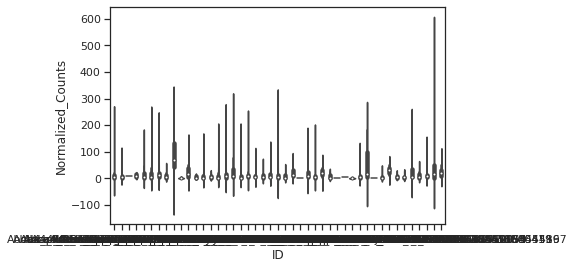